## New York City Data Analysis Project

In [1]:
## import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv(r'C:/Users/30694/Desktop/new_york_airbnb/new_york_listings_2024.csv')
df.shape

(20758, 22)

## Dataset Overview

In [3]:
# Display the first 5 rows
pd.set_option('display.max.columns', 22)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,30,3,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,30,9,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,2,6,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,30,156,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,30,11,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [4]:
# Display the last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20753,24736896,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,30,124,2023-09-29,1.81,1,157,12,No License,4.75,1,1,1
20754,2835711,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,30,56,2023-07-01,0.48,1,0,1,No License,4.46,1,2,1
20755,51825274,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,30,60,2023-12-08,2.09,1,0,27,No License,4.93,1,1,1
20756,782661008019550832,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,30,7,2023-09-17,0.91,1,363,7,No License,5.0,1,1,1
20757,566029911248687183,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,1,63,2023-12-10,4.50,1,0,62,OSE-STRREG-0000513,4.89,1,1,1


In [5]:
# Get the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [6]:
# Get basic statistics for specific numerical columns
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'beds', 'baths']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


## Data Cleaning

In [7]:
# Step 1: Missing Values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [8]:
# Step 2: Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [9]:
# Step 3: Correct Data Types
df['id'] = df['id'].astype(object)
df['host_id'] = df['host_id'].astype(object)
df['beds'] = df['beds'].astype(int)
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [10]:
# check why column bath has object type 
df[df['baths'] == 'Not specified'].shape[0]
df['baths'] = df['baths'].replace('Not specified', np.nan)
df['baths'] 


0        NaN
1          1
2          1
3          1
4          1
        ... 
20753      1
20754      1
20755      1
20756      1
20757      1
Name: baths, Length: 20758, dtype: object

In [11]:
# Drop rows where is NaN
df = df.dropna(subset=['baths'])  

# check the values of 'baths' column
df['baths'].value_counts()
df['baths'] = df['baths'].astype(float)
df.dtypes

id                                 object
name                               object
host_id                            object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                             float64
dtype: object

## Exploratory Data Analysis (EDA)

<Axes: xlabel='price'>

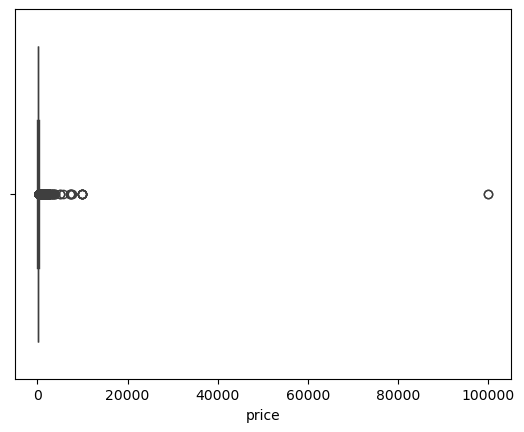

In [12]:
# Identifying outliers in column 'price'
sns.boxplot(data=df, x='price')

<Axes: xlabel='price'>

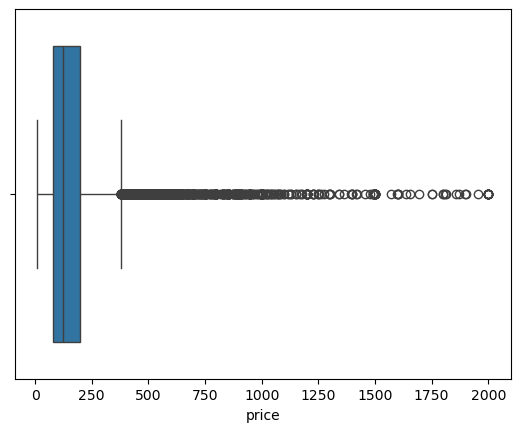

In [13]:
filtered_df = df[df['price']<=2000]
sns.boxplot(data=filtered_df, x='price')

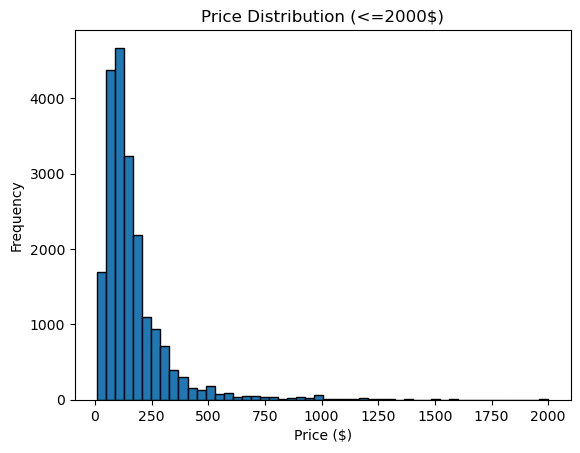

In [14]:
# plot the histogram for price <=2000$
plt.hist(filtered_df['price'], bins=50,edgecolor='black')
plt.title('Price Distribution (<=2000$)')
plt.xlabel('Price ($)')
plt.ylabel("Frequency")
plt.show()

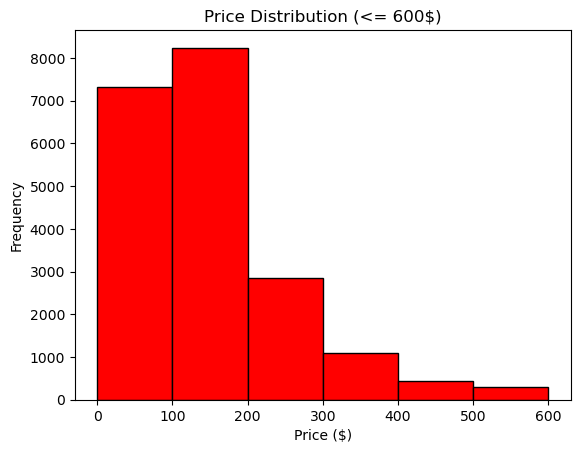

In [15]:

# Set custom bin edges 
bin_edges = np.arange(0, 700, 100) # From 0 to 600 with step 100

# Plot the histogram with the custom bins
plt.hist(filtered_df['price'], bins=bin_edges, color='red', edgecolor='black')
plt.title('Price Distribution (<= 600$)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['room_type'].value_counts()

room_type
Entire home/apt    11549
Private room        8791
Shared room          293
Hotel room           112
Name: count, dtype: int64

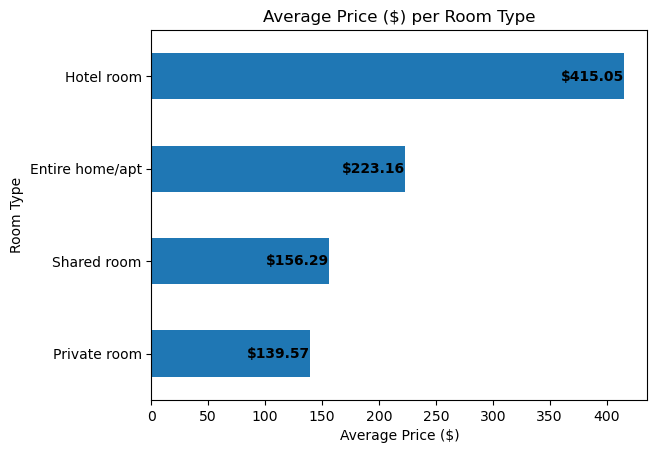

In [17]:
average_price_by_room_type = df.groupby('room_type')['price'].mean().sort_values()

ax = average_price_by_room_type.plot(kind='barh')
plt.title('Average Price ($) per Room Type')
plt.xlabel('Average Price ($)')
plt.ylabel('Room Type')

# Add the average price as a label on the right edge of each bar
for index, value in enumerate(average_price_by_room_type):
    ax.text(value, index, f'${value:.2f}', va='center', ha='right', color='black', fontweight='bold')

plt.show()

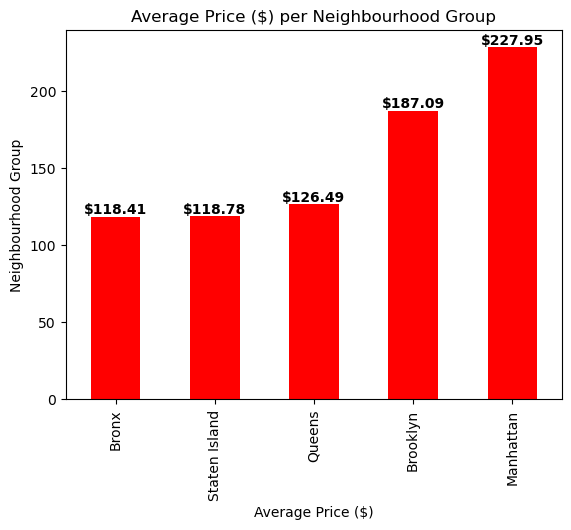

In [18]:
average_price_by_neighbourhood = df.groupby('neighbourhood_group')['price'].mean().sort_values()

ax1 = average_price_by_neighbourhood.plot(kind='bar', color='red')
plt.title('Average Price ($) per Neighbourhood Group')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighbourhood Group')

# Add the average price as a label on the right edge of each bar
for index, value in enumerate(average_price_by_neighbourhood):
    ax1.text(index, value, f'${value:.2f}', va='bottom', ha='center', color='black', fontweight='bold')

plt.show()

<Axes: >

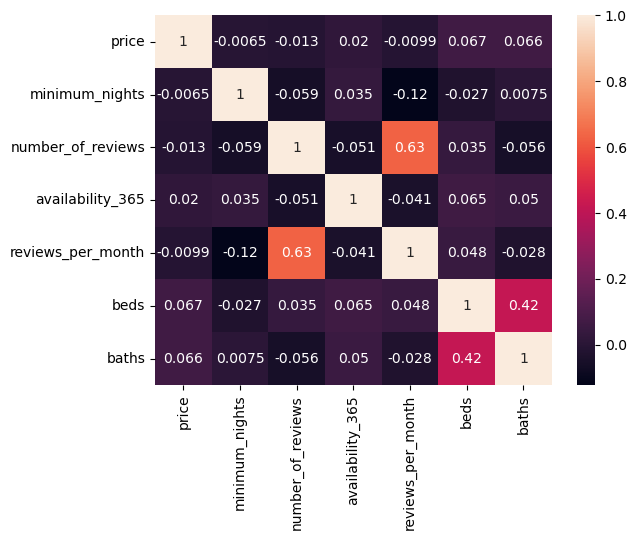

In [19]:
# heat map correlation
cor = df[['price', 'minimum_nights', 'number_of_reviews','availability_365', 'reviews_per_month', 'beds', 'baths']].corr()
cor

sns.heatmap(data=cor, annot=True)